모두를 위한 머신러닝 _ Back2Basic
============

02. Deep Neural Networks
-------------------------

---

### 순서

1. Neural Networks 기본 구조
2. Weight 초기화 잘해보자
3. 좀더 깊게 학습하자
4. 과적합(overfit)을 조심하자
5. 코드를 좀더 쉽게 짜자 + batch normalization


---

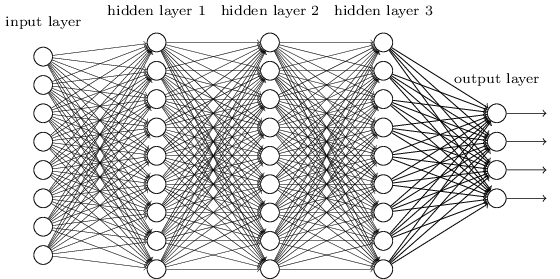

In [1]:
from IPython.display import Image
Image('images/DNN.png')

## 1. Neural Networks 기본 구조

In [1]:
# Lab 10 MNIST and NN
import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [3]:
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [4]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [5]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 142.999549505
Epoch: 0002 cost = 39.007174514
Epoch: 0003 cost = 24.230090864
Epoch: 0004 cost = 17.074619476
Epoch: 0005 cost = 12.475176308
Epoch: 0006 cost = 9.270980485
Epoch: 0007 cost = 6.951342438
Epoch: 0008 cost = 5.189651310
Epoch: 0009 cost = 3.908794404
Epoch: 0010 cost = 2.909502582
Epoch: 0011 cost = 2.263995670
Epoch: 0012 cost = 1.767280099
Epoch: 0013 cost = 1.324654158
Epoch: 0014 cost = 0.985986118
Epoch: 0015 cost = 0.768645065
Learning Finished!


In [6]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9466


### Neural Networks 기본 구조 : Accuracy: 0.9466

---

## [2. Weight 초기화 잘해보자](https://youtu.be/4rC0sWrp3Uw)

In [7]:
tf.reset_default_graph()

In [8]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### 기본 코딩

```
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3
```

### 바뀐 코드

initializer=tf.contrib.layers.xavier_initializer()   
이 한줄만 각 Weight에 추가해 주자 

In [9]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [10]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [11]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.314335657
Epoch: 0002 cost = 0.117633415
Epoch: 0003 cost = 0.075997386
Epoch: 0004 cost = 0.054362305
Epoch: 0005 cost = 0.040544481
Epoch: 0006 cost = 0.029994556
Epoch: 0007 cost = 0.023326523
Epoch: 0008 cost = 0.020927149
Epoch: 0009 cost = 0.017834161
Epoch: 0010 cost = 0.016094593
Epoch: 0011 cost = 0.009887012
Epoch: 0012 cost = 0.012589533
Epoch: 0013 cost = 0.011690972
Epoch: 0014 cost = 0.008835384
Epoch: 0015 cost = 0.009410106
Learning Finished!


In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9807


## xavier_initializer : Accuracy: 0.9807

---

## 3. 좀더 깊게 학습하자

먼저 두 번의 학습에는 Hidden(256, 256) layer를 사용하였는데  
이번 학습에는 (512, 512, 512 512)을 사용해 보자

In [13]:
tf.reset_default_graph()

In [14]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### 기존 코드

```
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3
```

### 바뀐 코드

In [15]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [16]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [17]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.298526395
Epoch: 0002 cost = 0.101041022
Epoch: 0003 cost = 0.068008622
Epoch: 0004 cost = 0.054449900
Epoch: 0005 cost = 0.039674233
Epoch: 0006 cost = 0.035228541
Epoch: 0007 cost = 0.028935099
Epoch: 0008 cost = 0.027715664
Epoch: 0009 cost = 0.021678644
Epoch: 0010 cost = 0.021653202
Epoch: 0011 cost = 0.020100989
Epoch: 0012 cost = 0.016889358
Epoch: 0013 cost = 0.016540583
Epoch: 0014 cost = 0.014072246
Epoch: 0015 cost = 0.014654518
Learning Finished!


In [18]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9784


### 깊고 넓은 학습을 하였는데   
* **xavier_initializer : Accuracy: 0.9807   **
* **more deep learing  : Accuracy: 0.9784   **

오히려 정확도가 떨어지는 현상이 발생하였다.  
deep 이 만능은 아닌가?

---

## [4. 과적합(overfit)을 조심하자](https://youtu.be/wTxMsp22llc)

In [19]:
tf.reset_default_graph()
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### feed_dict 에 넣을 drop out 확률을 placeholder로 만들어주자

In [20]:
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [21]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [22]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### 기존 코드

```
feed_dict = {X: batch_xs, Y: batch_ys}
```

### 바뀐 코드

In [23]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.456555411
Epoch: 0002 cost = 0.170737853
Epoch: 0003 cost = 0.128767314
Epoch: 0004 cost = 0.109363737
Epoch: 0005 cost = 0.090067676
Epoch: 0006 cost = 0.082606688
Epoch: 0007 cost = 0.072567134
Epoch: 0008 cost = 0.069842249
Epoch: 0009 cost = 0.060792556
Epoch: 0010 cost = 0.061154054
Epoch: 0011 cost = 0.054270615
Epoch: 0012 cost = 0.053909701
Epoch: 0013 cost = 0.048727911
Epoch: 0014 cost = 0.045662984
Epoch: 0015 cost = 0.045736827
Learning Finished!


In [24]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Accuracy: 0.9812


깊어지기만 한 (512, 512, 512 512)layer는 오히려 ACC가 떨어지는 현상이 있었다.

* xavier_initializer : ** Accuracy: 0.9807   **
* more deep learing  : ** Accuracy: 0.9784   **
* Drop out           : ** Accuracy: 0.9812   **   

확실히 정확도가 상승하였다.!

---

## 5. 코드를 좀더 쉽게 짜자 + batch normalization

배치 정규화는 입력데이터를 평균이 0, 분산이 1이 되도록 정규화 하는 것이다.  
* 학습을 빨리 진행할 수 있다.
* 초기값에 크게 의존하지 않는다.
* 오버피팅을 억제한다.  

## Input -> Affine -> Batch Norm -> ReLU


In [25]:
# Lab 10 MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope

In [26]:
# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

In [27]:
tf.reset_default_graph()

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

In [28]:
# layer output size
hidden_output_size = 512
final_output_size = 10

In [29]:
xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

In [30]:
# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer2, keep_prob, is_training=train_mode)
    
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer3, keep_prob, is_training=train_mode)
    
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer4, keep_prob, is_training=train_mode)
    
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")

In [31]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [32]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

[Epoch:    1] cost = 0.388123531
[Epoch:    2] cost = 0.320440165
[Epoch:    3] cost = 0.310938896
[Epoch:    4] cost = 0.305352802
[Epoch:    5] cost = 0.301247199
[Epoch:    6] cost = 0.297678033
[Epoch:    7] cost = 0.298393901
[Epoch:    8] cost = 0.29619412
[Epoch:    9] cost = 0.293782342
[Epoch:   10] cost = 0.292892772
[Epoch:   11] cost = 0.291028239
[Epoch:   12] cost = 0.291600839
[Epoch:   13] cost = 0.290768289
[Epoch:   14] cost = 0.290648866
[Epoch:   15] cost = 0.290030783
Learning Finished!


In [33]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

Accuracy: 0.986


똑같은 Layer를 사용했음에도 불구하고 Batch Normalization을 추가한 경우 

* Drop out    : Accuracy: 0.9812
* Batch Norm  : Accuracy: 0.986   
        
확실히 정확도가 증가하였다.

### Deep Neural Networks를 이용한 결과 최종적으로 Acc가 0.986 라는 좋은 결과를 얻었다. 

### 여기서 멈추지 않고 99%의 정확도를 달성하기위해 Convolution Neural Networks를 배워보도록 하자.